# Worst-case detumble

In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__, ".."))
import SatelliteDynamics
using Random
Random.seed!(0)


  Activating project at `~/research/non-monotonic-detumbling`


TaskLocalRNG()

In [2]:
include("../src/satellite_simulator.jl")
include("../src/detumble_controller.jl")
include("../src/satellite_models.jl")

3×3 Matrix{Float64}:
 0.001  0.0    0.0
 0.0    0.003  0.0
 0.0    0.0    0.005

In [3]:
params = OrbitDynamicsParameters(py4_model_diagonal;

    distance_scale=1.0,
    time_scale=1.0,
    angular_rate_scale=1.0,
    control_scale=1,
    control_type=:dipole,
    magnetic_model=:IGRF13,
    add_solar_radiation_pressure=true,
    add_sun_thirdbody=true,
    add_moon_thirdbody=true)

x_osc_0 = [400e3 + SatelliteDynamics.R_EARTH, 0.0, deg2rad(50), deg2rad(-1.0), 0.0, 0.0] # a, e, i, Ω, ω, M
# x_osc_0 = [525e3 + SatelliteDynamics.R_EARTH, 0.0001, deg2rad(97.6), deg2rad(-1.0), 0.0, 45.0] # a, e, i, Ω, ω, M
q0 = [1.0, 0.0, 0.0, 0.0]
ω0 = [0.0, 0.0, 0.0]



tspan = (0.0, 60.0 * 60.0)
x0 = state_from_osc(x_osc_0, q0, ω0)

x0 = h_B_aligned_initial_conditions(x0, deg2rad(50), params)


13-element Vector{Float64}:
       6.77710395701087e6
 -118294.78959490504
       0.0
      86.02735177981981
    4928.503682661721
    5874.456678131549
       0.15508705047693072
       0.3746535184890531
       0.9141021539511538
      -0.0
       0.0
       0.0
       0.8726646259971648

In [4]:
time_step=0.1

0.1

 22.518091 seconds (293.05 M allocations: 14.212 GiB, 5.78% gc time, 28.02% compilation time)


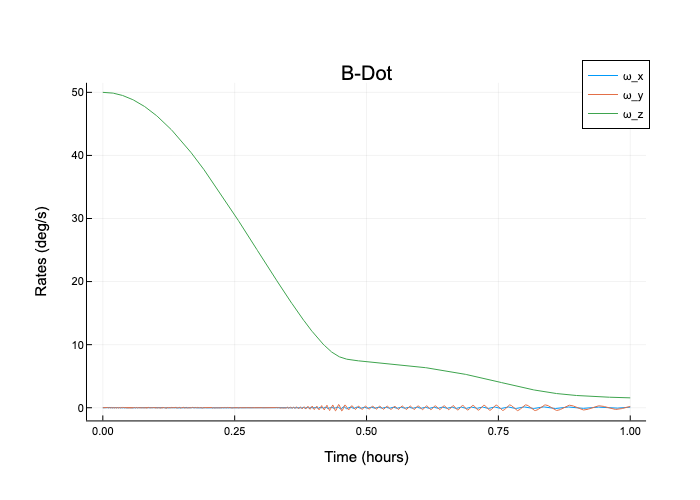

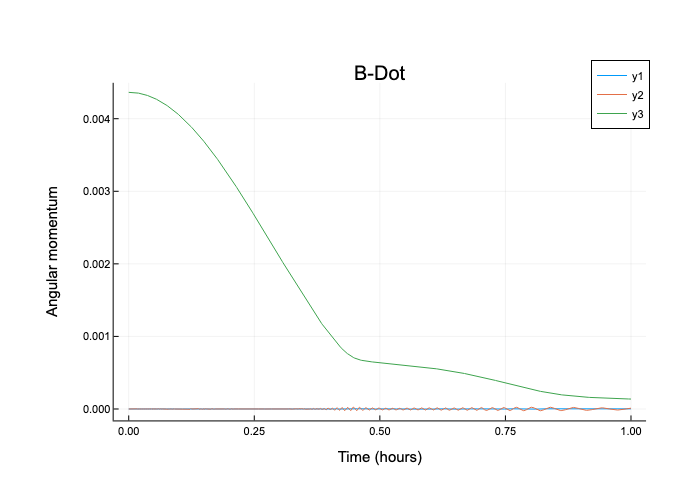

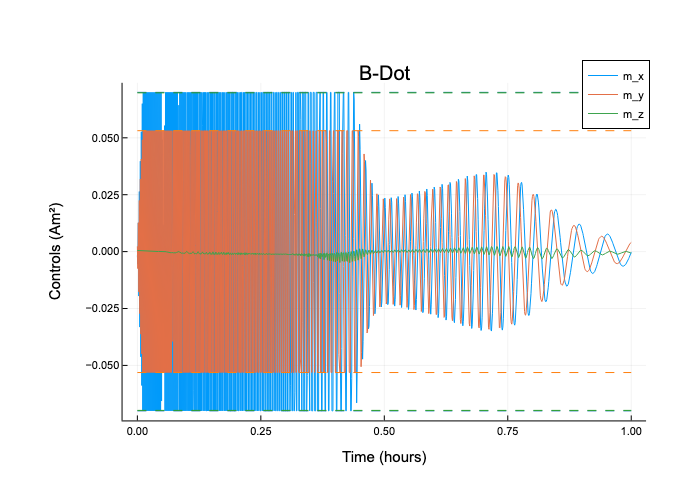

In [5]:
k_bdot = 1e0
@time xhist_bdot, uhist_bdot, thist_bdot = simulate_satellite_orbit_attitude_rk4(x0, params, tspan; integrator_dt=time_step, controller=(x, t, m) -> bdot_control(x, t, m; k=k_bdot, saturate=true), controller_dt=0.0)
# plot_position(thist_bdot, xhist_bdot; title="B-Dot")
# plot_velocity(thist_bdot, xhist_bdot; title="B-Dot")
# display(plot_attitude(thist_bdot, xhist_bdot; title="B-Dot"))
display(plot_rates(thist_bdot, xhist_bdot; title="B-Dot"))
display(plot_angular_momentum(thist_bdot, xhist_bdot, params; title="B-Dot"))
display(plot_controls(thist_bdot, uhist_bdot, params; title="B-Dot"))
# display(plot_B_inertial(thist_bdot, xhist_bdot, params; title="B-Dot"))
# display(plot_B_body(thist_bdot, xhist_bdot, params; title="B-Dot"))


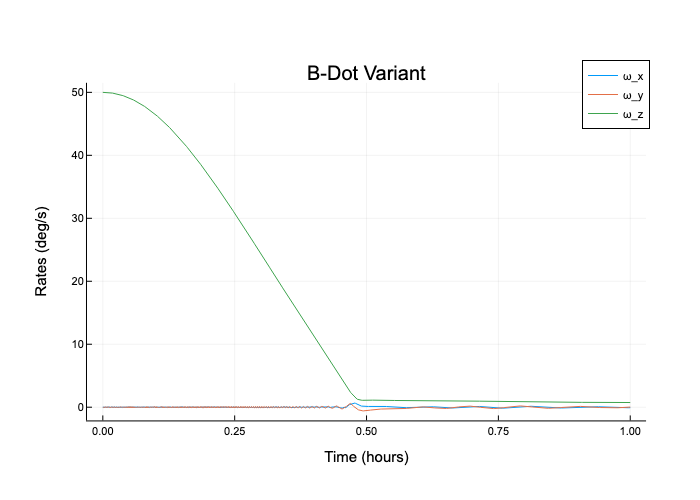

 14.435989 seconds (229.34 M allocations: 10.984 GiB, 7.03% gc time, 2.88% compilation time)


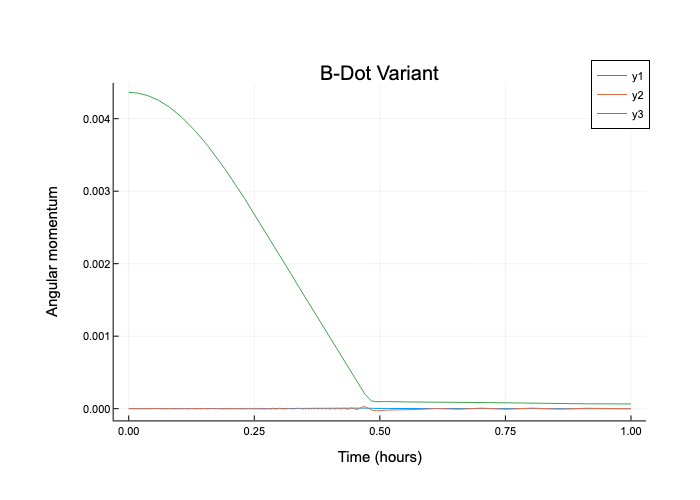

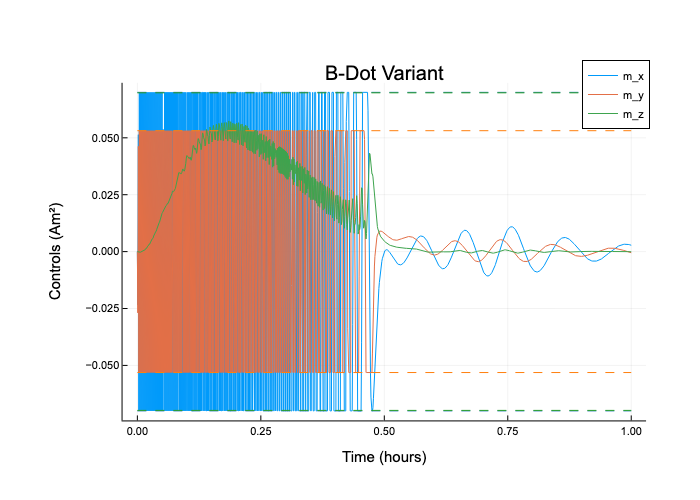

In [6]:
bdot_variant_controller = make_bdot_variant(time_step)
# bdot_variant_controller = bdot_variant_autodiff
k_bdotvariant = 4.0
@time xhist_bdotvariant, uhist_bdotvariant, thist_bdotvariant = simulate_satellite_orbit_attitude_rk4(x0, params, tspan; integrator_dt=time_step, controller=(x, t, m) -> bdot_variant_controller(x, t, m; k=k_bdotvariant, saturate=true), controller_dt=0.0)
# plot_position(thist_bdotvariant, xhist_bdotvariant; title="B-Dot Variant")
# plot_velocity(thist_bdotvariant, xhist_bdotvariant; title="B-Dot Variant")
# display(plot_attitude(thist_bdotvariant, xhist_bdotvariant; title="B-Dot Variant"))
display(plot_rates(thist_bdotvariant, xhist_bdotvariant; title="B-Dot Variant"))
display(plot_angular_momentum(thist_bdotvariant, xhist_bdotvariant, params; title="B-Dot Variant"))
display(plot_controls(thist_bdotvariant, uhist_bdotvariant, params; title="B-Dot Variant"))
# display(plot_B_inertial(thist_bdotvariant, xhist_bdotvariant, params; title="B-Dot Variant"))
# display(plot_B_body(thist_bdotvariant, xhist_bdotvariant, params; title="B-Dot Variant"))


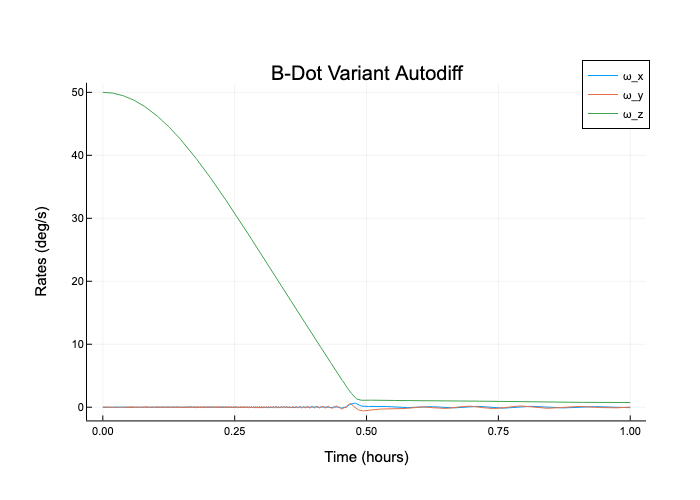

 14.311533 seconds (228.63 M allocations: 10.948 GiB, 7.05% gc time, 1.83% compilation time)


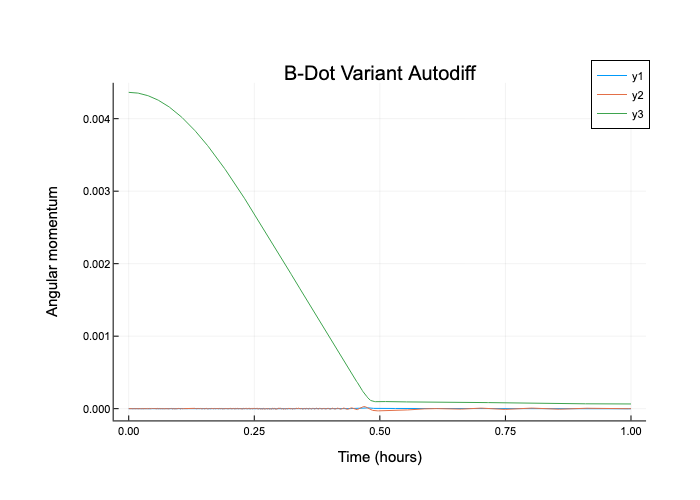

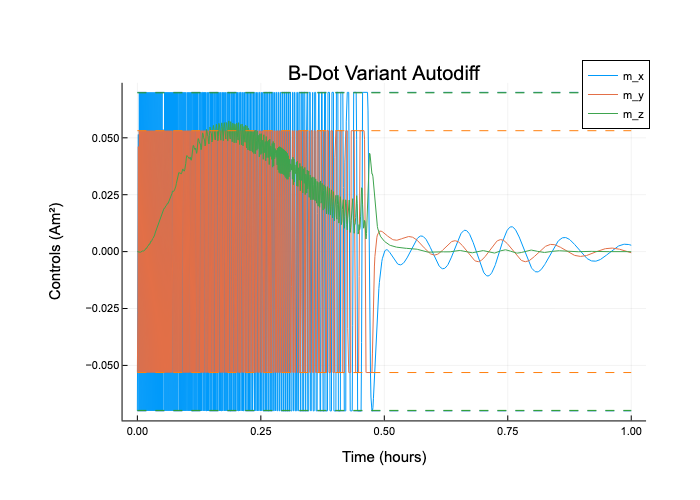

In [7]:
@time xhist_bdotvariant_autodiff, uhist_bdotvariant_autodiff, thist_bdotvariant_autodiff = simulate_satellite_orbit_attitude_rk4(x0, params, tspan; integrator_dt=time_step, controller=(x, t, m) -> bdot_variant_controller(x, t, m; k=k_bdotvariant, saturate=true), controller_dt=0.0)
# plot_position(thist_bdotvariant_autodiff, xhist_bdotvariant_autodiff; title="B-Dot Variant Autodiff")
# plot_velocity(thist_bdotvariant_autodiff, xhist_bdotvariant_autodiff; title="B-Dot Variant Autodiff")
# display(plot_attitude(thist_bdotvariant_autodiff, xhist_bdotvariant_autodiff; title="B-Dot Variant Autodiff"))
display(plot_rates(thist_bdotvariant_autodiff, xhist_bdotvariant_autodiff; title="B-Dot Variant Autodiff"))
display(plot_angular_momentum(thist_bdotvariant_autodiff, xhist_bdotvariant_autodiff, params; title="B-Dot Variant Autodiff"))
display(plot_controls(thist_bdotvariant_autodiff, uhist_bdotvariant_autodiff, params; title="B-Dot Variant Autodiff"))
# display(plot_B_inertial(thist_bdotvariant_autodiff, xhist_bdotvariant_autodiff, params; title="B-Dot Variant Autodiff"))
# display(plot_B_body(thist_bdotvariant_autodiff, xhist_bdotvariant_autodiff, params; title="B-Dot Variant Autodiff"))
